## CONCRETE COMPONENTS, AGE, AND STRENGTH: ##
## Analyzing Correlations and Using Machine Learning to Make Predictions ##
---
## Stefan DeZarn ##
### March 2023 ###
---

Concrete is the second-most used raw material in the world, after water. Concrete's usefulness comes mainly from its **compressive strength**. In this notebook, we can analyze the relationships between the ingredients in concrete and its age with our target variable, its strength.

After analysis, we will choose, tune, and train a machine learning model to predict concrete strengths based on the other available information in the dataset.

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#First, we import the relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

/kaggle/input/concrete-compressive-strength/Concrete Compressive Strength.csv


In [2]:
# Here I read the data into a pandas dataframe.

df = pd.read_csv('/kaggle/input/concrete-compressive-strength/Concrete Compressive Strength.csv')

# Initial Exploration and Cleaning

In [3]:
# Let's get a quick glimpse of our dataframe
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
# Additionally we need to know the datatype of each column to make sure we know how they will behave.

df.dtypes

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                  int64
Concrete compressive strength(MPa, megapascals)          float64
dtype: object

The datatypes of all the columns are numerical, which is what we need to analyze correlations. No modifications are required.

In [5]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

These columns, though informative, will be arduous to do computations with. Lets simplify and rename them.

In [6]:
df = df.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':'cement', 
           'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'slag',
           'Fly Ash (component 3)(kg in a m^3 mixture)':'fly_ash',
           'Water  (component 4)(kg in a m^3 mixture)':'water',
           'Superplasticizer (component 5)(kg in a m^3 mixture)':'superplasticizer',
          'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'coarse_agg',
           'Fine Aggregate (component 7)(kg in a m^3 mixture)': 'fine_agg',
           'Age (day)':'age',
           'Concrete compressive strength(MPa, megapascals) ':'strength'})

In [7]:
df.head()

,cement,slag,fly_ash,water,superplasticizer,coarse_agg,fine_agg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   fly_ash           1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarse_agg        1030 non-null   float64
 6   fine_agg          1030 non-null   float64
 7   age               1030 non-null   int64  
 8   strength          1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [9]:
for col in df.columns:
    pct_na = np.mean(df[col].isna())
    print('{} has {}% NA values'.format(col, pct_na))

cement has 0.0% NA values
slag has 0.0% NA values
fly_ash has 0.0% NA values
water has 0.0% NA values
superplasticizer has 0.0% NA values
coarse_agg has 0.0% NA values
fine_agg has 0.0% NA values
age has 0.0% NA values
strength has 0.0% NA values


We don't have any columns with NA values to contend with. Splendid!

In [10]:
# Lets do a check for duplicate rows
sum(df.duplicated())

25

Our check tells us there are 25 duplicate rows.

In [11]:
# We can drop the duplicated rows
df = df.drop_duplicates()

In [12]:
#We can look at the distributions of the variables
df.describe()

,cement,slag,fly_ash,water,superplasticizer,coarse_agg,fine_agg,age,strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.629055,72.043134,55.535075,182.074378,6.031647,974.376468,772.686617,45.856716,35.250273
std,104.345003,86.170555,64.207448,21.340740,5.919559,77.579534,80.339851,63.734692,16.284808
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,190.680000,0.000000,0.000000,166.610000,0.000000,932.000000,724.300000,7.000000,23.523542
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.798114
75%,349.000000,142.500000,118.270000,192.940000,10.000000,1031.000000,822.200000,56.000000,44.868340
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


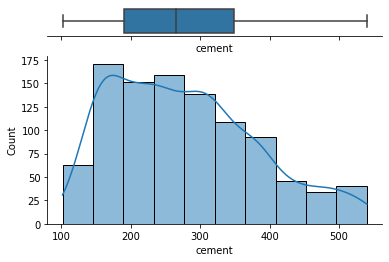

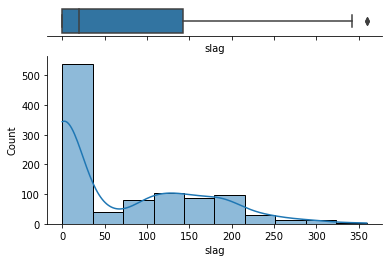

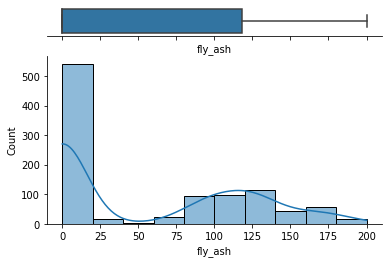

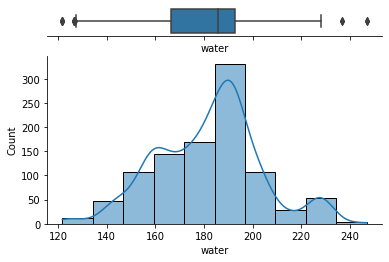

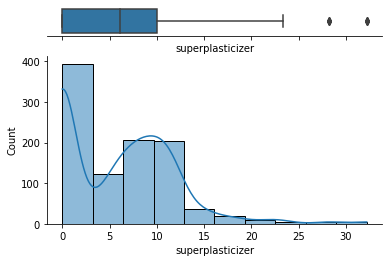

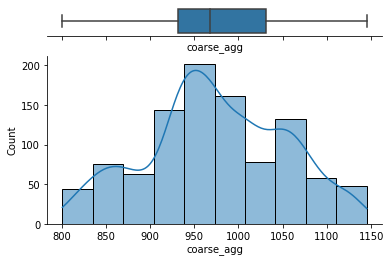

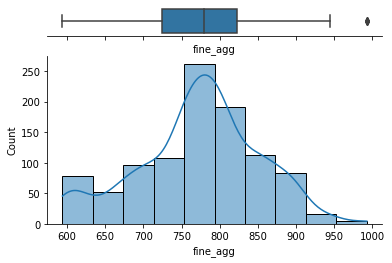

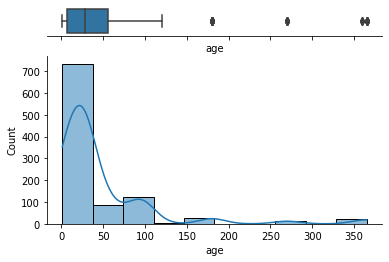

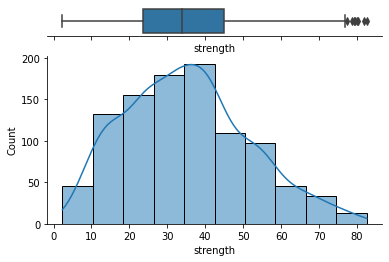

In [13]:
# We can vizualize the distributions of our variables

for column in df:
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

    sns.boxplot(x=df[column], ax=ax_box)
    sns.histplot(x=df[column], bins=10, kde=True, ax=ax_hist)

    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)

We can see that slag, flyash, and superplasticizer have many zero values. This is to be expected as they are not strictly necessary in structural concrete, but are used as additives for various reasons.

# Analyzing Relationships

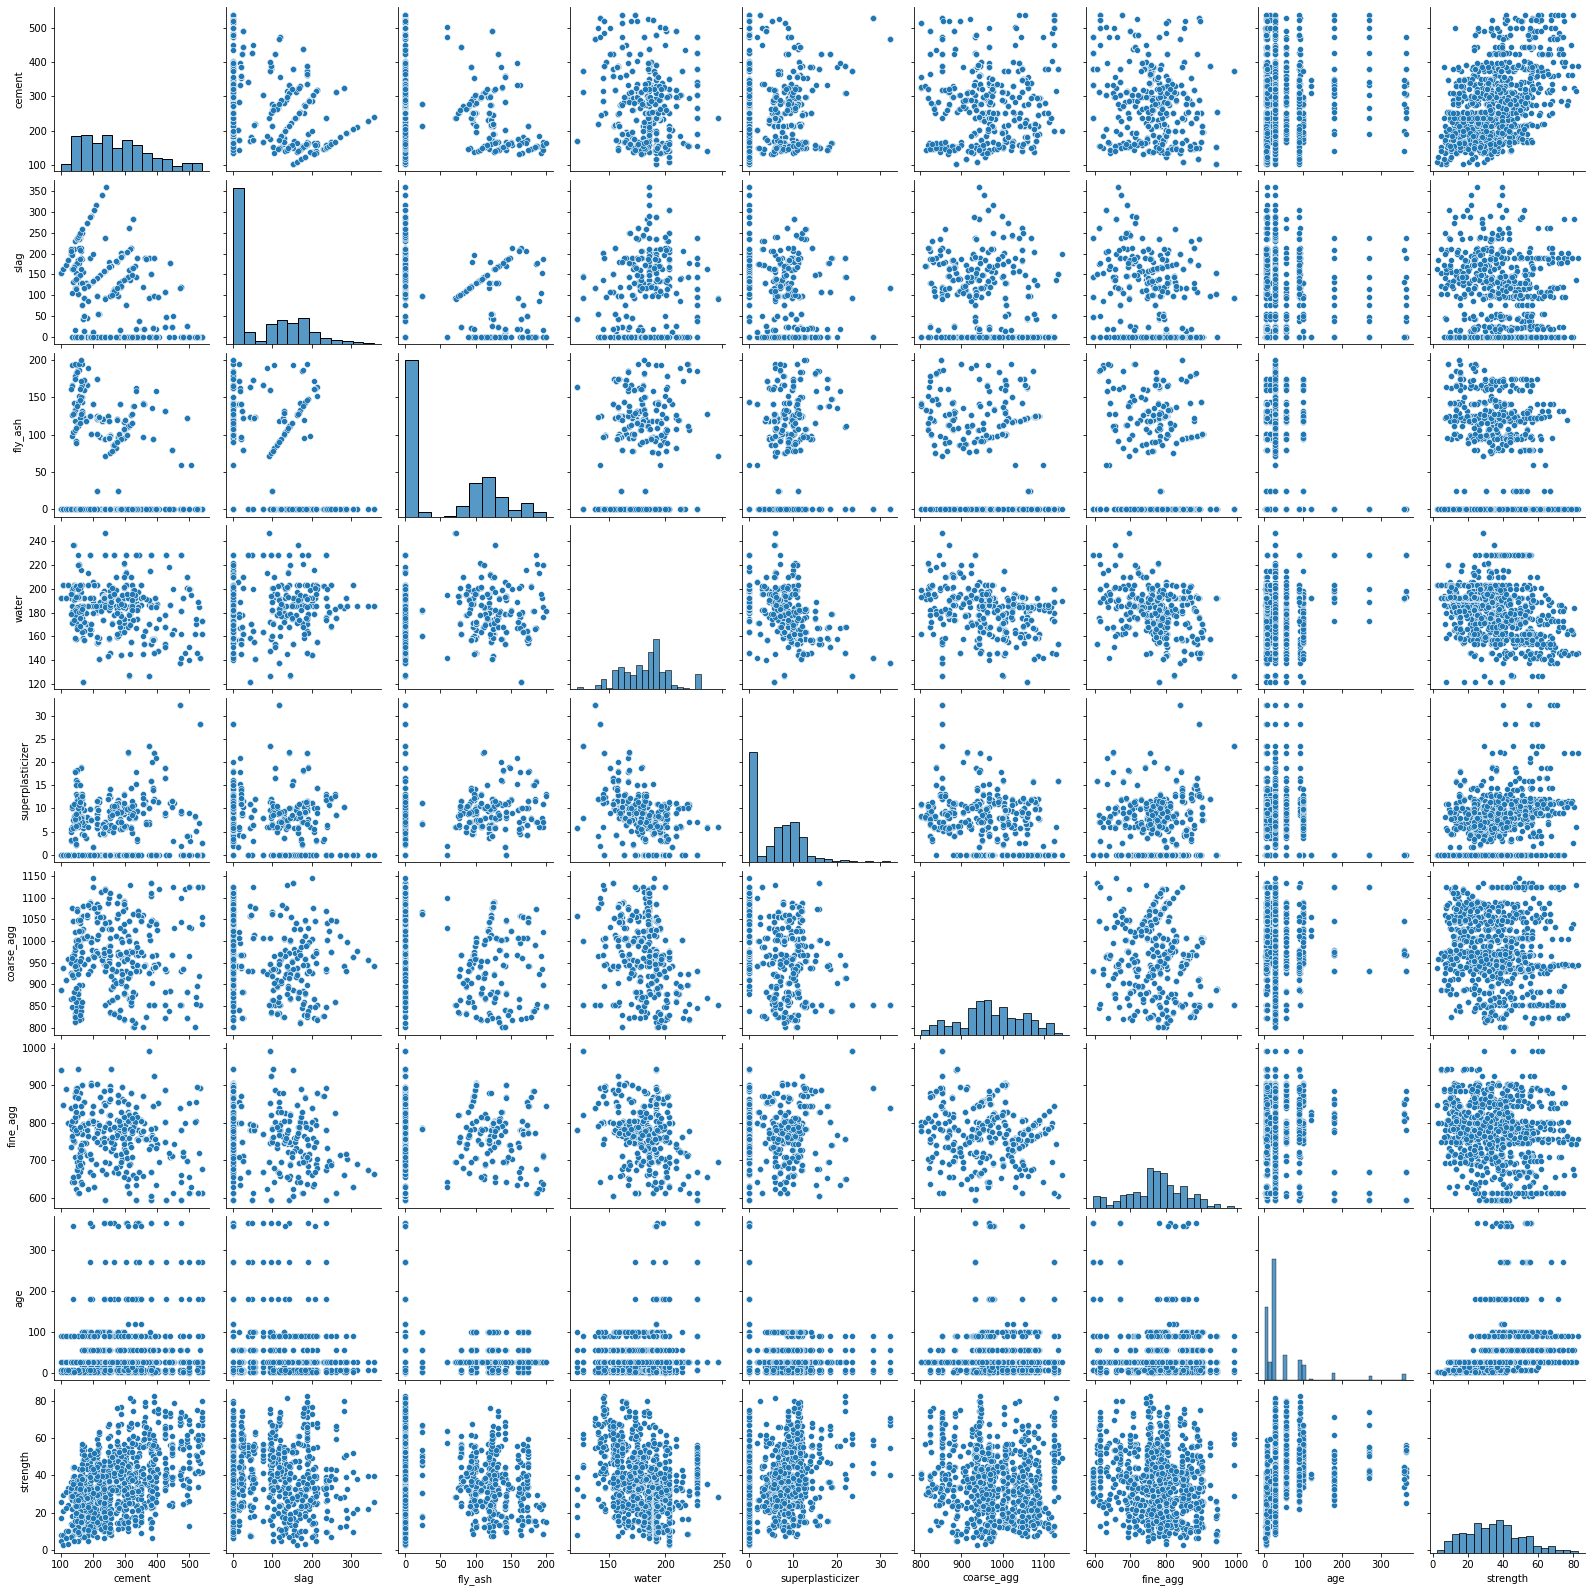

In [14]:
# We can see all our variables plotted against eachother to look for obvious relationships.
sns.pairplot(df)

At first glance, we see a few things:
* An apparent linear relationship between cement and strength
* Perhaps a negative linear relationship between superplasticizer and water
* The discrete ages that compressive strength tests were performed

Because of the discrete ages, a violin plot is more useful in vizualizing the relationship.

<AxesSubplot:title={'center':'Age vs. Strength'}, xlabel='age', ylabel='strength'>

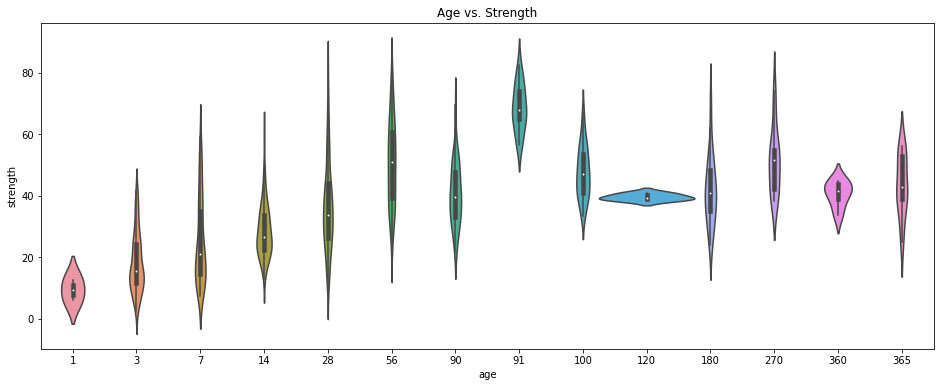

In [15]:
plt.figure(figsize=(16, 6), label='Age vs. Strength')
plt.title('Age vs. Strength')
sns.violinplot(data=df, x="age", y="strength", width=1.5, )

This plot more clearly shows a positive correlation between age and strength, which maybe levels off after ~100 days.

In [16]:
# This Correlation Matrix shows the Pearson Correlation between all variables in our dataframe

df.corr()

,cement,slag,fly_ash,water,superplasticizer,coarse_agg,fine_agg,age,strength
cement,1.000000,-0.303301,-0.385618,-0.056583,0.061296,-0.086212,-0.245379,0.086349,0.488283
slag,-0.303301,1.000000,-0.312342,0.130295,0.019902,-0.277558,-0.289676,-0.042759,0.103370
fly_ash,-0.385618,-0.312342,1.000000,-0.283372,0.414055,-0.026485,0.090229,-0.158940,-0.080648
water,-0.056583,0.130295,-0.283372,1.000000,-0.646875,-0.212495,-0.444888,0.279269,-0.269606
superplasticizer,0.061296,0.019902,0.414055,-0.646875,1.000000,-0.242031,0.207794,-0.194094,0.344225
coarse_agg,-0.086212,-0.277558,-0.026485,-0.212495,-0.242031,1.000000,-0.162212,-0.005263,-0.144710
fine_agg,-0.245379,-0.289676,0.090229,-0.444888,0.207794,-0.162212,1.000000,-0.156572,-0.186457
age,0.086349,-0.042759,-0.158940,0.279269,-0.194094,-0.005263,-0.156572,1.000000,0.337371
strength,0.488283,0.103370,-0.080648,-0.269606,0.344225,-0.144710,-0.186457,0.337371,1.000000


Text(0.5, 1.0, "Pearson's Correlation Heatmap")

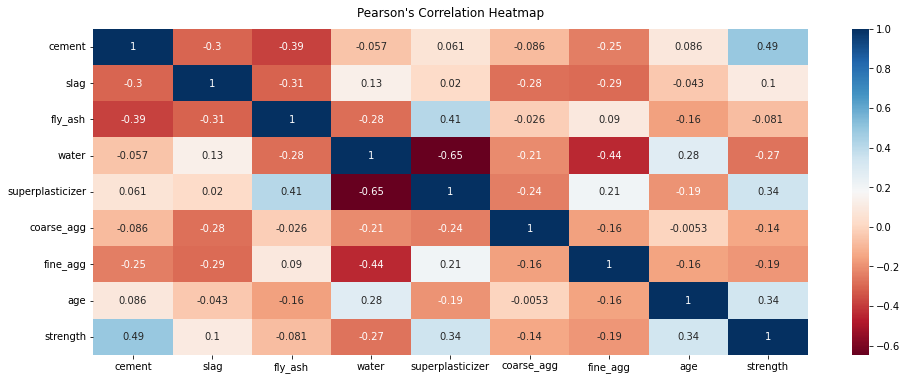

In [17]:
#Pearson Heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(), annot=True, cmap='RdBu')
plt.title("Pearson's Correlation Heatmap", fontdict={'fontsize':12}, pad=12)       

We can see that our strongest correlations are water & superplasticizer, cement & strength, fine_agg & water, superplasticizer & flyash, and cement & flyash. None are particularly strong, only the correlation of water & superplasticizer is above .5.

In [18]:
# Let's look at a sorted list of each feature's pearson correlation with our target variable,strength

correlations = []
for col in df.columns.drop('strength'):
    val = scipy.stats.pearsonr(df[col],df.strength)[0]
    correlations.append({
        'Feature':col,
        'Correlation with Strength':val
    })
    
pd.DataFrame(correlations).sort_values('Correlation with Strength', ascending=False)
    
    

,Feature,Correlation with Strength
0,cement,0.488283
4,superplasticizer,0.344225
7,age,0.337371
1,slag,0.103370
2,fly_ash,-0.080648
5,coarse_agg,-0.144710
6,fine_agg,-0.186457
3,water,-0.269606


Our strongest correlations (positive or negative) with compressive strength appear to be cement, superplasticizer, age, and water.

It is well known in the construction material industry that the ratio of cement to water in a concrete mix is a valuable variable in determining strength. We can create that feature and investigate its correlation with strength.

In [19]:
# Creating a column for cement/water ratio
df['cement_water_ratio'] = df['cement']/df['water']

# Determine the Pearson Correlation between C/W ratio and strength
correlation = scipy.stats.pearsonr(df['cement_water_ratio'],df['strength'])[0]
print('The correlation between C/W Ratio and Strength is {}'.format(correlation))


The correlation between C/W Ratio and Strength is 0.548700031856856


C/W Ratio becomes our variable with the strongest correlation with strength.

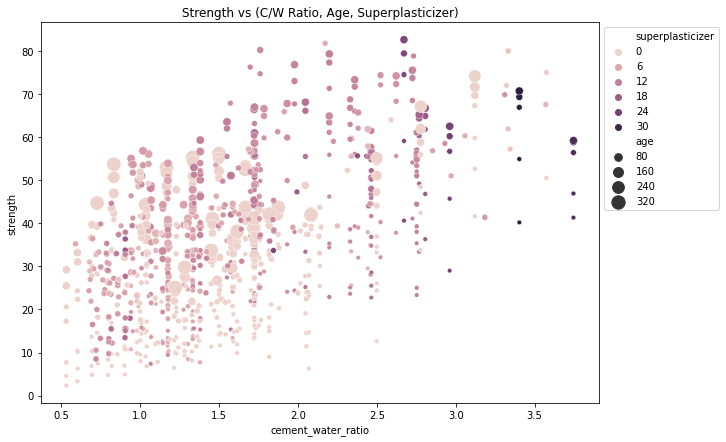

In [20]:
# This plot represents our three strongest independent correlations with strength

fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="strength", x="cement_water_ratio", hue="superplasticizer", size="age", data=df, ax=ax, sizes=(20, 200))
ax.set_title("Strength vs (C/W Ratio, Age, Superplasticizer)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

## Conclusions about our dataset:
* Strongest overall correlation: Water & Superplasticizer
* Cement has the highest magnitude correlation with Strength
* After engineering the Cement/Water Ratio variable, it has the highest correlation with Strength
* Age also has a not-insignificant correlation with Strength

# Using Machine Learning to Predict Concrete Strength

Now that we are familiar with our dataset, we will utilize the sklearn and xgboost libraries to help us build models with the goal of accurately predicting concrete strength based on the other variables in the data.

In [21]:
# Import the necessary tools
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

## Prepare the Data for Machine Learning

In preparation for training our models, we must first separate our input variables from our target variable. Then we use train_test_split to give us a random sample of the data to train our model and a random sample to test our model on. We then use MinMaxScaler to scale the data so that larger- and smaller-magnitude variables get treated equally by the model.

In [22]:
#Define inputs and targets
input_columns =df.columns.drop('strength')
inputs = df[input_columns]
targets = df['strength']

In [23]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.25, random_state=0)

In [24]:
# Min/Max Scaling of numeric features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

We will use K-fold Cross Validation to validate our models as we choose which model to use and also as we tune the hyperparameters for the chosen model.

In [25]:
# Set up our K-Fold situation to have 5 splits

kf = KFold(n_splits=5, shuffle=True, random_state=0)

## Getting a Baseline Score for Different Regression Models

Here, we will get a baseline score for a group of the most common regression models. Once we see which one performs best at a baseline, we can tune that model for optimal performance.

In [26]:
# Define a helper function to get a baseline score using K-fold cross validation for our models.
def ModelScoreWithCV(model):
    score = cross_val_score(model, X_train, y_train, cv= kf, scoring="r2")
    print("Baseline mean R-squared from K-fold CV of {} is {}".format(model, round(np.mean(score), 4)))

    

In [27]:
models = [LinearRegression(), Ridge(), Lasso(), DecisionTreeRegressor(), RandomForestRegressor(), XGBRegressor()]
for model in models:
    ModelScoreWithCV(model)

Baseline mean R-squared from K-fold CV of LinearRegression() is 0.5669
Baseline mean R-squared from K-fold CV of Ridge() is 0.566
Baseline mean R-squared from K-fold CV of Lasso() is 0.1523
Baseline mean R-squared from K-fold CV of DecisionTreeRegressor() is 0.8001
Baseline mean R-squared from K-fold CV of RandomForestRegressor() is 0.8859
Baseline mean R-squared from K-fold CV of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
         

Sorry for the output mess, but we can see that the XGBRegressor model won handily when judged by the R-squared metric with a score of .9064. We can now tune the hyperparameters to optimize the model.

## Hyperparameter Tuning

We again use K-fold Cross Validation to try different values for key hyperparameters for optimal performance as judged by an R-squared score.

In [28]:
# Define a helper function to use K-fold CV to test hyperparameters
def TestXGBParams(**params):
    score = cross_val_score(XGBRegressor(**params, n_jobs=-1, random_state=23), X_train, y_train, cv= kf, scoring="r2")
    print("Mean R-squared from K-fold CV with {} is {}".format(params, round(np.mean(score), 4)))

    

### Optimizing n_estimators

In [29]:
estimators = [1,2,4,8,16,32,64,128,256]
for n in estimators:
    TestXGBParams(n_estimators=n)

Mean R-squared from K-fold CV with {'n_estimators': 1} is -1.9463
Mean R-squared from K-fold CV with {'n_estimators': 2} is -0.5881
Mean R-squared from K-fold CV with {'n_estimators': 4} is 0.4638
Mean R-squared from K-fold CV with {'n_estimators': 8} is 0.8348
Mean R-squared from K-fold CV with {'n_estimators': 16} is 0.8899
Mean R-squared from K-fold CV with {'n_estimators': 32} is 0.9025
Mean R-squared from K-fold CV with {'n_estimators': 64} is 0.9061
Mean R-squared from K-fold CV with {'n_estimators': 128} is 0.9065
Mean R-squared from K-fold CV with {'n_estimators': 256} is 0.9062


In [30]:
estimators = [127, 128, 129, 130, 131, 132, 133]
for n in estimators:
    TestXGBParams(n_estimators=n)

Mean R-squared from K-fold CV with {'n_estimators': 127} is 0.9065
Mean R-squared from K-fold CV with {'n_estimators': 128} is 0.9065
Mean R-squared from K-fold CV with {'n_estimators': 129} is 0.9065
Mean R-squared from K-fold CV with {'n_estimators': 130} is 0.9064
Mean R-squared from K-fold CV with {'n_estimators': 131} is 0.9064
Mean R-squared from K-fold CV with {'n_estimators': 132} is 0.9064
Mean R-squared from K-fold CV with {'n_estimators': 133} is 0.9064


### Optimizing max_depth

In [31]:
depths = [1, 2, 4, 8, 16]
for n in depths:
    TestXGBParams(n_estimators = 128, max_depth = n)

Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 1} is 0.8546
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 2} is 0.8976
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4} is 0.9189
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 8} is 0.896
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 16} is 0.8951


In [32]:
depths =[3, 4, 5, 6, 7]
for n in depths:
    TestXGBParams(n_estimators = 128, max_depth = n)

Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 3} is 0.9066
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4} is 0.9189
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 5} is 0.9056
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 6} is 0.9065
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 7} is 0.9025


### Optimizing learning_rate

In [33]:
rates =[.2, .3, .4]
for n in rates:
    TestXGBParams(n_estimators = 128, max_depth = 4, learning_rate = n)

Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.2} is 0.9111
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.3} is 0.9189
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.4} is 0.9071


In [34]:
rates =[.3, .30025, .3005]
for n in rates:
    TestXGBParams(n_estimators = 128, max_depth = 4, learning_rate = n)

Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.3} is 0.9189
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.30025} is 0.9148
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.3005} is 0.9182


### Training XGBRegressor with Optimized Hyperparameters

We take the hyperparameter values we arrived upon in the previous excercise, and train our model on the training dataset. 

In [35]:
model = XGBRegressor(n_estimators = 128, max_depth = 4, learning_rate = .3, n_jobs=-1, random_state = 23)

In [36]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=128,
             n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=23,
             reg_alpha=0, reg_lambda=1, ...)

### Using the Model to Make Predictions on our Test set
Now, the moment of truth. We put our model to use to predict the strengths in the test dataset and get some corresponding scores to see how well it performed.

In [37]:
preds = model.predict(X_test)
r_squared = r2_score(y_test, preds)
MSE = mean_squared_error(y_test, preds)
RMSE = np.sqrt(mean_squared_error(y_test, preds))
MAE = mean_absolute_error(y_test, preds)

print('Our Optimized XGBRegressor got the following scores on the test set:')
print('R-squared: {}'.format(r_squared))
print('MSE: {}'.format(MSE))
print('RMSE: {}'.format(RMSE))
print('MAE: {}'.format(MAE))

Our Optimized XGBRegressor got the following scores on the test set:
R-squared: 0.9459583066967986
MSE: 15.520726027575273
RMSE: 3.939635265805107
MAE: 2.7502226023735803


# R-squared of .9459
I think we can be quite pleased with this result. This can be interpreted as: Our model can account for 94.59% of the variance in the data.

## Feature Importances

Here we get a look at how much each input variable factored in to our final model.

In [38]:
# Create a dataframe showing the feature importances
importances = pd.DataFrame({
    'Feature': inputs.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)
importances

,Feature,Importance
8,cement_water_ratio,0.417040
7,age,0.213676
4,superplasticizer,0.107438
1,slag,0.097849
6,fine_agg,0.039400
0,cement,0.037876
3,water,0.036228
2,fly_ash,0.030405
5,coarse_agg,0.020087


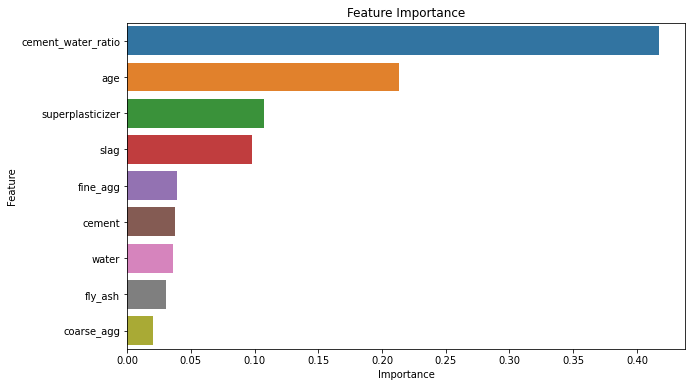

In [39]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importances.head(10), x='Importance', y='Feature');